In [4]:
import numpy as np
import pandas as pd
from math import sqrt, isqrt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [5]:
def validate_triple(tp:list[int]) -> bool:
    w = tp[0]
    x = tp[1]
    y = tp[2]
    d = y*y-w*w
    sd = isqrt(d)
    if d != sd*sd:
        return False
    d = y*y-x*x
    sd = isqrt(d)
    if d != sd*sd:
        return False
    d = x*x-w*w
    sd = isqrt(d)
    if d != sd*sd:
        return False
    return True

In [2]:
import pandas as pd

df = pd.read_csv('../data/pythagorean_12000000.csv')
df_small = df[0:100]
triples = df_small[['x', 'z', 'w']].to_numpy()

In [12]:
from sympy.ntheory.factor_ import factorint

def count_primes_4xplus1(n:int):
    cnt = 0
    cnts = factorint(n)
    for prime, prime_cnt in cnts.items():
        if prime % 4 == 1:
            cnt += prime_cnt
    return cnt

def analyze_counts(triples:list[int]):
    rows = triples.shape[0]
    for row in range(0, rows):
        w = triples[row][0]
        x = triples[row][1]
        y = triples[row][2]
        print(count_primes_4xplus1(w),count_primes_4xplus1(x),count_primes_4xplus1(y))

analyze_counts(triples)

1 2 2
0 2 2
2 2 3
0 2 3
0 1 2
1 3 2
0 1 3
0 2 3
1 2 3
3 2 3
1 2 2
0 2 2
2 2 3
0 2 3
1 2 2
0 2 2
0 1 2
1 3 2
0 3 2
2 2 2
0 1 3
0 2 3
1 2 3
3 2 3
1 3 3
1 2 3
2 2 3
0 2 3
1 2 2
0 2 2
0 1 2
1 3 2
2 2 2
0 2 2
0 1 3
0 2 3
1 2 3
3 2 3
2 3 3
2 3 3
1 3 3
1 3 3
1 2 3
1 2 3
1 1 3
1 3 3
2 2 3
0 2 3
1 2 3
0 3 3
1 1 2
2 3 2
1 2 2
0 2 2
1 2 4
1 2 4
0 1 2
1 3 2
0 3 2
2 2 2
0 1 3
0 2 3
1 2 3
3 2 3
3 3 2
0 1 2
3 3 4
1 3 4
1 2 2
0 2 2
1 3 3
1 2 3
1 2 3
2 4 3
1 2 4
1 3 4
1 2 4
1 2 4
2 3 4
4 3 4
2 2 3
0 2 3
1 2 2
0 2 2
1 2 2
0 2 2
1 2 2
0 2 2
0 1 2
1 3 2
2 2 3
0 2 3
0 3 2
2 2 2
2 2 2
0 2 2
0 1 3
0 2 3
1 2 3
3 2 3


In [9]:
def get_6tuple(tp:list[float]) -> list[float]:
    w = tp[0]
    x = tp[1]
    y = tp[2]
    return [y,w,x,sqrt(x**2-w**2),sqrt(y**2-x**2),sqrt(y**2-w**2)]

def rotate(tuple:list[float]) -> list[float]:
    y = tuple[0]
    v = tuple[4]
    w = tuple[5]
    return [y, y*w/v, w, tuple[2]*w/v, tuple[1], y*tuple[3]/v]

def generate_cycle(triple:list[int]) -> list:
    res = []
    tuple = get_6tuple(triple)
    for i in range (0,6):
        res.append(tuple)
        tuple = rotate(tuple)
    return res

def rotate_np(tuple:np.ndarray) -> np.ndarray:
    y = tuple[0]
    v = tuple[4] #=y^2-x^2
    w = tuple[5] #=y^2-w^2
    return [y, np.float(y*w/v), w, np.float(tuple[2]*w/v), tuple[1], np.float(y*tuple[3]/v)]

def generate_cycle_np(triple:np.ndarray) -> np.ndarray:
    res = np.empty((6,6), dtype=np.float)
    tuple = np.array(get_6tuple(triple), dtype=np.float)
    for i in range (0,6):
        res[i]=tuple
        tuple = rotate_np(tuple)
    return res

triple = [153, 185, 697]
print(np.array_str(generate_cycle_np(triple), precision=2, suppress_small=True))


[[697.   153.   185.   104.   672.   680.  ]
 [697.   705.3  680.   187.2  153.   107.87]
 [697.   491.4  107.87 479.42 705.3  852.81]
 [697.   842.78 852.81 130.43 491.4  473.78]
 [697.   672.   473.78 822.22 842.78 185.  ]
 [697.   153.   185.   104.   672.   680.  ]]


C:\Users\esultano\AppData\Local\Temp/ipykernel_5936/731959858.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  res = np.empty((6,6), dtype=np.float)
C:\Users\esultano\AppData\Local\Temp/ipykernel_5936/731959858.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tuple = np.array(get_6tuple(triple), dtype=np.float)
C:\Users\esultano\A

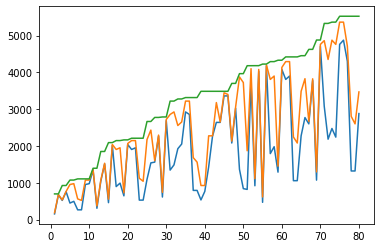

In [46]:
import matplotlib.pyplot as plt

limit = 80
dom = np.linspace(1,limit,limit)

triples_sorted = triples[triples[:, 2].argsort()]
w = triples_sorted[0:limit,0]
x = triples_sorted[0:limit,1]
y = triples_sorted[0:limit,2]

plt.plot(dom, w)
plt.plot(dom, x)
plt.plot(dom, y)